<a href="https://colab.research.google.com/github/OyelekeOlayemi/Diabetes-Project/blob/master/Diabetes_Prediction_using_Multiple_Scikit_Learn_ML_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries 

In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/My Drive')
!ls

 6fa12b40cd69abbf97f15c8f8068c187.png
'Colab Notebooks'
'datalab banner.jpg'
'Datalab Brochures'
'DataLab Python Brochure.pdf'
'data science courses in Nigeria.jpg'
'data science meetup 1.png'
'data science meetup 2.png'
'data science meetup 3.png'
'data science meetup bola 2.png'
'data science meetup Bola.png'
'data science meetup collins 1.png'
'data science meetup collins 2.png'
'data science meetup collins 3.png'
'Data Science Meetup Group.png'
'data science meetup victor 1.png'
'data science meetup yemi 1.png'
'data science meetup yemi 2.png'
'data science meetup yemi 3.png'
'data science training in nigeria 1.png'
'data science training in nigeria 2.png'
'data science training in nigeria 3.png'
'data science training in nigeria 4.png'
'data science training in nigeria 5.png'
 diabetes_processed.csv
'Getting started.pdf'
'Google Review.PNG'
'https:  datalab.com.ng  Performance 2020-01-07 (1).gsheet'
'https:  datalab.com.ng  Performance 2020-01-07.gsheet'
'LOGO 3.jpg'
'School Budge

# Data Exploration

In [8]:
diabetes_data = pd.read_csv('diabetes_processed.csv')
diabetes_data.head(10)
#Our task here is to predict if a person is diabetic or not diabetic using the person other features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,155.548223,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,155.548223,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.548223,32.0,0.232,54.0,1


In [9]:
#Check the number of roles and columns in the dataset
diabetes_data.shape

(768, 9)

In [0]:
#Verify if any null value exist in the dataset
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
#Get to know columns data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [0]:
#Scale our dataset, except for the target column (Outcome). Most machine learning classifiers prefer this
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
diabetes_data[cols_to_norm] = StandardScaler().fit_transform(diabetes_data[cols_to_norm])

In [0]:
#View the final scaled data
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.033518,0.563604,-3.345079e-16,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.529859,-0.112017,-3.345079e-16,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.695306,0.225793,-3.345079e-16,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.529859,-0.787638,-7.243887e-01,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.680669,0.563604,1.465506e-01,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,2.027450,2.877840e-01,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.198965,-0.337224,-3.345079e-16,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.033518,-0.787638,-5.125386e-01,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.026200,0.225793,-3.345079e-16,-0.342155,-0.371101,1.170732,1


# Implementing Multiple Machine Learning Algorithms on the Dataset 

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Naive Bayes Classifier
5. Support Vector Classifierent 
6. K-Nearest Neighbors Classifier
7. Gradient Boosting Classifier
8. Adaboost Classifier

#Our task here is to predict if a person is diabetic or not diabetic using the person other features

#Scikit-Learn provides these machine learning classifiers and functions to achieve this

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [0]:
# x are all our features (after droping our target 'Outcome')
# y is the target we are trying to predict (that is Outcome)
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [0]:
#Split our dataset into two: 

#1. Training data to train all our classifiers on real data and
#2. Test data to evaluate their performance on unseen data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Test size is 0.2 means we would be training each of our classifiers with 80% of the data 
#and validating them with the remaining 20%.

# x_train - 80% Fraction of our features for training our classifiers algorithms
# y_train - 80% Fraction of the matching target for training our classifiers algorithms

# x_test - 20% hold-out fraction of our features for testing the performance of our classifiers 
# from the training phase above by producing - "y_pred".

# y_test - 20% hold-out fraction of our matching target. This is used in comparing actuals (y_test) with y_pred (predictions made)

#Random state guarantee that same sequence of random numbers are generated for training each of our classifiers

In [0]:
x_train.shape

(614, 8)

In [0]:
y_train.shape

(614,)

In [0]:
#80% of target variable (Outcome) - 614 records
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [0]:
x_test.shape

(154, 8)

In [0]:
y_test.shape

(154,)

In [0]:
#20% of target variable (Outcome) - 154 records
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [0]:
#Define the Machine Learning Classifiers
lr = LogisticRegression() 
gs = GaussianNB()
sv = SVC(kernel='rbf', random_state=0)
gb= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
kn = KNeighborsClassifier(n_neighbors = 18) 
ad = AdaBoostClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 70)

In [0]:
#Fit function trains all our machine learning classifiers on 80% of our data.
lr.fit(x_train, y_train);
gs.fit(x_train, y_train);
svclassifier.fit(x_train, y_train);
gb.fit(x_train,y_train);
kn.fit(x_train,y_train);
ad.fit(x_train,y_train);
dt.fit(x_train, y_train);
rf.fit(x_train, y_train);

In [0]:
#Get individual classifiers training scores
print("Training_score : " , lr.score(x_train, y_train))
print("Training_score : " , gs.score(x_train, y_train))
print("Training_score : " , svclassifier.score(x_train, y_train))
print("Training_score : " , gb.score(x_train, y_train))
print("Training_score : " , kn.score(x_train, y_train))
print("Training_score : " , ad.score(x_train, y_train))
print("Training_score : " , dt.score(x_train, y_train))
print("Training_score : " , rf.score(x_train, y_train))

#The decision tree and random forest is over-Fitting our data. The best training model is the GradientBoostingClassifier.

#The Gradient Boosting Classifier is an ensemble ML that works by combining many weak learning models together 
#to create a strong predictive model (by aggregating the output from many models).

Training_score :  0.7671009771986971
Training_score :  0.742671009771987
Training_score :  0.758957654723127
Training_score :  0.9218241042345277
Training_score :  0.7752442996742671
Training_score :  0.8648208469055375
Training_score :  1.0
Training_score :  1.0


Accuracy of the GBM on training set: 0.92


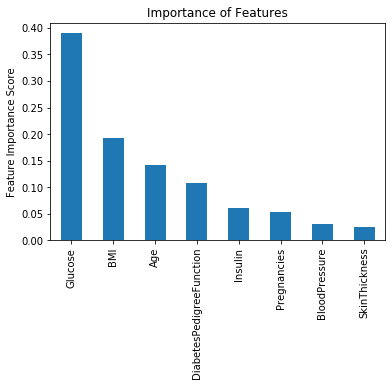

In [0]:
### Get important features in the training set using our best model - Gradient Boosting Classifier
predictors=list(x_train)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#Re-print accuracy of Gradient Boosting in the training phase.
print('Accuracy of the GBM on training set: {:.2f}'.format(gb.score(x_train, y_train)))

#Glucose, BMI and Age are the only important features, 
#but Boosting help us to combine the other weak learners into a single strong learner.

In [0]:
# Predict targets for unseen dataset (x_test) by using all our classifiers
y_pred1 = lr.predict(x_test)
y_pred2 = gs.predict(x_test)
y_pred3 = svclassifier.predict(x_test)
y_pred4 = gb.predict(x_test)
y_pred5 = kn.predict(x_test)
y_pred6 = ad.predict(x_test)
y_pred7 = dt.predict(x_test)
y_pred8 = rf.predict(x_test)

In [0]:
# Get accuracy score which show the predictive power of each classifier at classifying correct 'outcome'(diabetic or not)
print("Testing_score : ", accuracy_score(y_test, y_pred1))
print("Testing_score : ", accuracy_score(y_test, y_pred2))
print("Testing_score : ", accuracy_score(y_test, y_pred3))
print("Testing_score : ", accuracy_score(y_test, y_pred4))
print("Testing_score : ", accuracy_score(y_test, y_pred5))
print("Testing_score : ", accuracy_score(y_test, y_pred6))
print("Testing_score : ", accuracy_score(y_test, y_pred7))
print("Testing_score : ", accuracy_score(y_test, y_pred8))

#Gradient Boosting Classifier end up being the best classifier on unseen data. 
#Logistic Regression too is fairly ok, just need tweaking.

Testing_score :  0.8116883116883117
Testing_score :  0.7922077922077922
Testing_score :  0.7987012987012987
Testing_score :  0.8181818181818182
Testing_score :  0.8051948051948052
Testing_score :  0.7922077922077922
Testing_score :  0.7142857142857143
Testing_score :  0.7987012987012987


In [0]:
#Extract the predictions into a dataframe
gb_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred4})

In [0]:
gb_results

,y_test,y_pred
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [0]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred4)
print(cf_matrix)

[[91 16]
 [12 35]]


#### k-Fold Cross Validation using the Gradient Boosting Classifier
K-fold Cross Validation(CV) divide the data into folds and ensure that each fold is used as a testing set at some point. 
(This ensures all folds have equal chance of featuring as test set and train set at some point).

In [0]:
# Evaluate the Gradiant Boosting Classifier With k-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(gb, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 76.69% (5.80%)


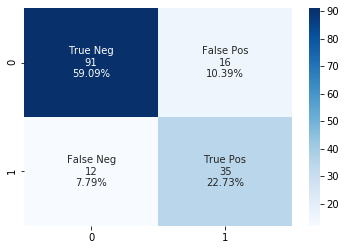

In [0]:
#Use Seaborn to get a Graphical Confusion Matrix for our best machine learning classifier

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# ROC AUC Plots to Evaluate the Performance of all our Classifiers

#It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number 
#of different candidate threshold values between 0.0 and 1.0.

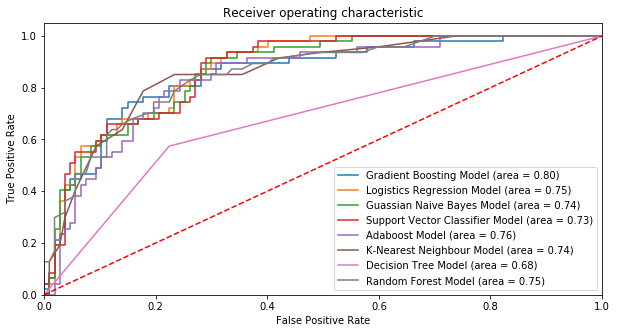

In [0]:
#calculate values for ROC AUC plot
gb_roc_auc = roc_auc_score(y_test, gb.predict(x_test))
fprgb, tprgb, thresholdsgb = roc_curve(y_test, gb.predict_proba(x_test)[:,1])

lr_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fprlr, tprlr, thresholdslr = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

gs_roc_auc = roc_auc_score(y_test, gs.predict(x_test))
fprgs, tprgs, thresholdsgs = roc_curve(y_test, gs.predict_proba(x_test)[:,1])

ad_roc_auc = roc_auc_score(y_test, ad.predict(x_test))
fprad, tprad, thresholdsad = roc_curve(y_test, ad.predict_proba(x_test)[:,1])

kn_roc_auc = roc_auc_score(y_test, kn.predict(x_test))
fprkn, tprkn, thresholdskn = roc_curve(y_test, kn.predict_proba(x_test)[:,1])

dt_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
fprdt, tprdt, thresholdsdt = roc_curve(y_test, dt.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fprrf, tprrf, thresholdsrt = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

svclassifier_roc_auc = roc_auc_score(y_test, svclassifier.predict(x_test))
fprsv, tprsv, thresholdssv = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])


plt.figure(figsize=(10,5))
plt.plot(fprgb, tprgb, label='Gradient Boosting Classifier (area = %0.2f)' % gb_roc_auc)
plt.plot(fprlr, tprlr, label='Logistics Regression Classifier (area = %0.2f)' % lr_roc_auc)
plt.plot(fprgs, tprgs, label='Guassian Naive Bayes Model (area = %0.2f)' % gs_roc_auc)
plt.plot(fprsv, tprsv, label='Support Vector Classifier Model (area = %0.2f)' % svclassifier_roc_auc)
plt.plot(fprad, tprad, label='Adaboost Model (area = %0.2f)' % ad_roc_auc)
plt.plot(fprkn, tprkn, label='K-Nearest Neighbour Model (area = %0.2f)' % kn_roc_auc)
plt.plot(fprdt, tprdt, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)
plt.plot(fprrf, tprrf, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#ROC AUC: It tells how much model is capable of seperating classes. 
#Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
#By analogy, Higher the AUC, better the model is at distinguishing between patients with diabetes and no diabetes.